## To predict the percentage of marks of an student based on the number of study hours

Author: Achyuth J Shankar

MAKE SURE YOU ARE CONNECTED TO INTERNET to IMPORT DATASET

In [1]:
# Importing the required Libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "https://bit.ly/studentsStudyMarks"
s_data = pd.read_csv(url)
print("Data imported successfully")
s_data.head(25)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


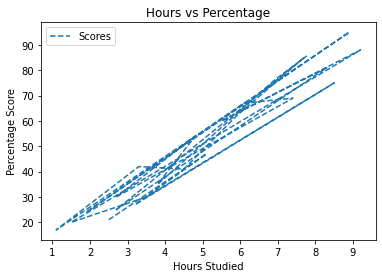

In [3]:
# Plotting the distribution of score
s_data.plot(x='Hours', y='Scores', style='--')  #style could be changed to 'o' '-'
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [4]:
x = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [5]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

In [6]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


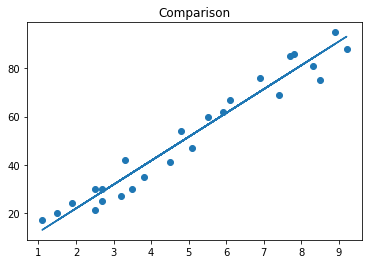

In [7]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.title("Comparison")
plt.show()

In [8]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
score_pred=np.array([5])
score_pred=score_pred.reshape(-1,1)
predict=regressor.predict(score_pred)
print("No of hours={}".format(5))
print("Predicted Score={}".format(predict[0]))

No of hours=5
Predicted Score=51.57144244464587


In [11]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


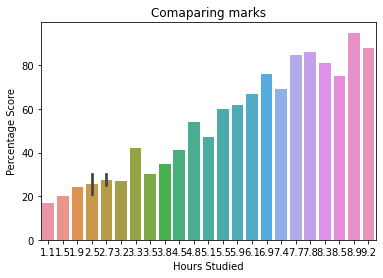

In [12]:
import seaborn as sns
sns.barplot(y='Scores', x='Hours', data=s_data)
plt.title('Comaparing marks')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()